<a href="https://colab.research.google.com/github/XeniaZhou/computer-vision/blob/master/Cloud_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [48]:
import getpass

APIKEY = getpass.getpass()

··········


In [49]:
!pip install google-auth
!pip install --upgrade pip
!pip install --upgrade google-api-python-client

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.1)
Requirement already up-to-date: google-api-python-client in /usr/local/lib/python3.6/dist-packages (1.10.0)


# Text Detection

In [50]:
import IPython.display

IPython.display.Image(url="https://storage.googleapis.com/computer-vision/slogan.jpg",
                      width=600)



In [51]:
from googleapiclient.discovery import build
import base64

In [52]:
IMAGE="https://storage.googleapis.com/computer-vision/slogan.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 5,
                }]
            }],
        })
responses = request.execute(num_retries=5)
print(responses['responses'][0]['textAnnotations'][0]['description'])

САТCHY
SLOGANS
COSMETIC BUSINESS
-
www.thebrandboy.com



# Label Detection

In [53]:
IPython.display.Image(url="https://storage.googleapis.com/computer-vision/181.jpg",
                      width=600)

In [54]:
IMAGE2="https://storage.googleapis.com/computer-vision/181.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE2
                    }
                },
                'features': [{
                    'type': 'LABEL_DETECTION',
                    'maxResults': 7,
                }]
            }],
        })
responses = request.execute(num_retries=7)
labels = responses['responses'][0]['labelAnnotations']
for i in labels:
  print("description: ",i['description'],"; score: ", i['score'], "; topicality: ", i['topicality'])

description:  Fashion ; score:  0.895908 ; topicality:  0.895908
description:  Performance ; score:  0.88376856 ; topicality:  0.88376856
description:  Singer ; score:  0.8285444 ; topicality:  0.8285444
description:  Outerwear ; score:  0.8030299 ; topicality:  0.8030299
description:  Human ; score:  0.7467646 ; topicality:  0.7467646
description:  Fashion model ; score:  0.7455054 ; topicality:  0.7455054
description:  Pop music ; score:  0.70748806 ; topicality:  0.70748806


# LOGO Detection

In [55]:
IPython.display.Image(url="https://storage.googleapis.com/computer-vision/logo.jpg",
                      width=600)

In [57]:
IMAGE3="https://storage.googleapis.com/computer-vision/logo.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE3
                    }
                },
                'features': [{
                    'type': 'LOGO_DETECTION',
                    'maxResults': 6,
                }]
            }],
        })
responses = request.execute(num_retries=6)
logos = responses['responses'][0]['logoAnnotations']
for i in logos:
  print("description: ",i['description'],"; score: ", i['score'])

description:  Starbucks ; score:  0.9984207
description:  Pepsi ; score:  0.9906508
description:  Sevel ; score:  0.85181856


# Face Detection

In [58]:
IPython.display.Image(url="https://storage.googleapis.com/computer-vision/friends.jpg",
                      width=600)

In [63]:
IMAGE4="https://storage.googleapis.com/computer-vision/friends.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE4
                    }
                },
                'features': [{
                    'type': 'FACE_DETECTION',
                    'maxResults': 6,
                }]
            }],
        })
responses = request.execute(num_retries=6)
print(responses)

{'responses': [{'faceAnnotations': [{'boundingPoly': {'vertices': [{'x': 507, 'y': 508}, {'x': 764, 'y': 508}, {'x': 764, 'y': 806}, {'x': 507, 'y': 806}]}, 'fdBoundingPoly': {'vertices': [{'x': 538, 'y': 574}, {'x': 743, 'y': 574}, {'x': 743, 'y': 785}, {'x': 538, 'y': 785}]}, 'landmarks': [{'type': 'LEFT_EYE', 'position': {'x': 616.357, 'y': 650.87463, 'z': -0.00024676323}}, {'type': 'RIGHT_EYE', 'position': {'x': 688.2461, 'y': 673.50604, 'z': 16.828857}}, {'type': 'LEFT_OF_LEFT_EYEBROW', 'position': {'x': 598.48755, 'y': 622.59595, 'z': -1.2996578}}, {'type': 'RIGHT_OF_LEFT_EYEBROW', 'position': {'x': 645.43304, 'y': 642.564, 'z': -12.125706}}, {'type': 'LEFT_OF_RIGHT_EYEBROW', 'position': {'x': 678.2336, 'y': 651.65, 'z': -4.297143}}, {'type': 'RIGHT_OF_RIGHT_EYEBROW', 'position': {'x': 719.29803, 'y': 660.05286, 'z': 26.912163}}, {'type': 'MIDPOINT_BETWEEN_EYES', 'position': {'x': 657.7459, 'y': 664.9144, 'z': -6.9463463}}, {'type': 'NOSE_TIP', 'position': {'x': 646.3871, 'y': 71

In [60]:
from PIL import Image, ImageDraw

In [116]:
def highlight_faces(image, faces):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
    for face in faces:
      box = []
      for vertex in face['boundingPoly']['vertices']:
        if 'x' in vertex:
          b = vertex['y']
          a = vertex['x']
          temp = (a,b)
          box.append(temp)
      draw.line(box + [box[0]], width=5, fill='#00ff00')
      init = 0
      if 'x' in face['boundingPoly']['vertices'][0]:
        init = face['boundingPoly']['vertices'][0]['x']
      draw.text((init,
      face['boundingPoly']['vertices'][0]['y'] - 30),
                  str(format(face['detectionConfidence'], '.3f')) + '%',
                  fill='#FF0000')
      # Place the confidence value/score of the detected faces above the
      # detection box in the output image
    im.save(image)
    
        

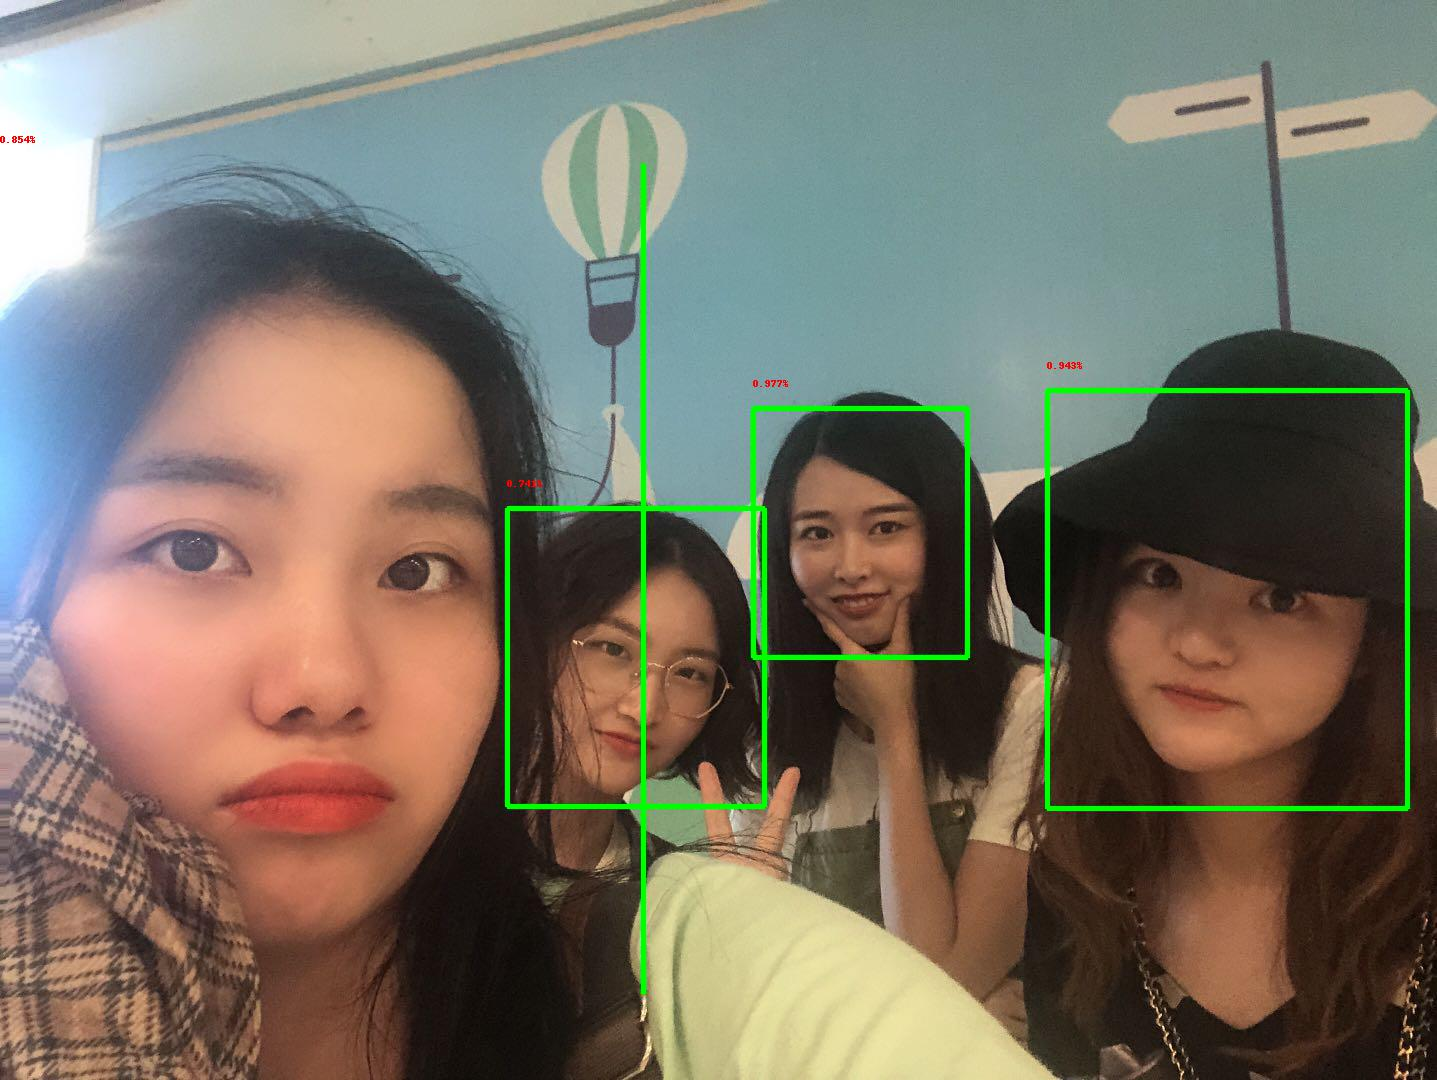

In [117]:
#print(responses['responses'][0]['faceAnnotations'][0]['boundingPoly']['vertices'][0]['y'])
highlight_faces("/content/friends.jpg", responses['responses'][0]['faceAnnotations'])
IPython.display.Image("/content/friends.jpg",width=600)

# Image Properties

In [118]:
IPython.display.Image(url="https://storage.googleapis.com/computer-vision/lxj.jpg",
                      width=600)

In [127]:
IMAGE5="https://storage.googleapis.com/computer-vision/lxj.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE5
                    }
                },
                'features': [{
                    'type': 'IMAGE_PROPERTIES',
                    'maxResults': 6,
                }]
            }],
        })
responses = request.execute(num_retries=8)
colors = responses['responses'][0]['imagePropertiesAnnotation']['dominantColors']['colors']
for i in colors:
  print("color: ", i['color'])
  print("score: ",i['score'])

color:  {'red': 178, 'green': 145, 'blue': 161}
score:  0.23972847
color:  {'red': 136, 'green': 119, 'blue': 143}
score:  0.1366547
color:  {'red': 41, 'green': 48, 'blue': 67}
score:  0.1004117
color:  {'red': 112, 'green': 73, 'blue': 55}
score:  0.01198887
color:  {'red': 118, 'green': 115, 'blue': 135}
score:  0.07590708
color:  {'red': 83, 'green': 89, 'blue': 112}
score:  0.06314774
